<a href="https://colab.research.google.com/github/beallac/iitsec2022/blob/main/Experiment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analysis Overview
=================



In [1]:
# import standard Python packages
import numpy as np
import pandas as pd 
import seaborn as sns

from scipy.stats import ttest_ind, ttest_rel
from statsmodels.stats.power import TTestIndPower
import statsmodels.api as sm
from statsmodels.formula.api import ols

#====================================================================
SUMMARY_DATA        = 'https://raw.githubusercontent.com/beallac/iitsec2022/main/ab4_stim_21_83_8s_data_summary.csv'
TIME_SERIES_DATA    = 'https://raw.githubusercontent.com/beallac/iitsec2022/main/ab4_stim_21_83_8s_data_gaze.csv.gz'
#====================================================================

# Summary data

In [2]:
# Load the summary data file
sdata = pd.read_csv(SUMMARY_DATA)
# sdata.describe()
sdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     40 non-null     float64
 1   ID       40 non-null     int64  
 2   Correct  40 non-null     int64  
 3   HR       40 non-null     float64
 4   CL       40 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 1.7 KB


In [3]:
# Set the dataframe's index to the ID column
df = sdata[sdata.ID != 42].set_index('ID')
df.info()
df.describe()
# df.head(50)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 21 to 83
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     36 non-null     float64
 1   Correct  36 non-null     int64  
 2   HR       36 non-null     float64
 3   CL       36 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.4 KB


,Time,Correct,HR,CL
count,36.000000,36.000000,36.000000,36.000000
mean,324.753689,0.888889,55.025833,0.595556
std,152.842875,0.318728,1.546200,0.078829
min,71.911900,0.000000,53.000000,0.400000
25%,197.800725,1.000000,54.000000,0.537500
50%,324.930350,1.000000,54.820000,0.605000
75%,451.006075,1.000000,55.722500,0.660000
max,579.597300,1.000000,61.070000,0.710000


21         AxesSubplot(0.1,0.15;0.363636x0.75)
83    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

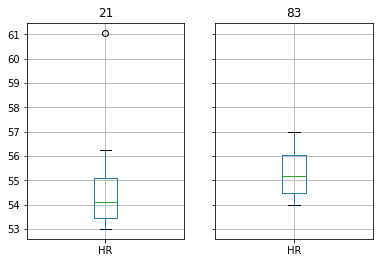

In [4]:
# Prepare the data for grouping by index ID
grouped = df.groupby(level = 'ID')

# Create a boxplot of heartrate
grouped.boxplot(column = 'HR')

21         AxesSubplot(0.1,0.15;0.363636x0.75)
83    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

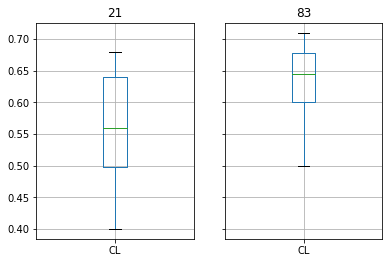

In [5]:
# Create a boxplot of cognitive load
grouped.boxplot(column = 'CL')

In [6]:
print(grouped.mean())

          Time   Correct         HR        CL
ID                                           
21  280.973922  1.000000  54.705556  0.563333
83  368.533456  0.777778  55.346111  0.627778


In [7]:
sample1 = df[df.index == 21]
sample2 = df[df.index == 83]

print('Heart rate:')
print( ttest_rel(sample1['HR'], sample2['HR']) )
print()
print('Cognitive load:')
print( ttest_rel(sample1['CL'], sample2['CL']) )

Heart rate:
Ttest_relResult(statistic=-1.1402799246507427, pvalue=0.2699806595307406)

Cognitive load:
Ttest_relResult(statistic=-2.6960024257809887, pvalue=0.015302181457311595)


ID
21    AxesSubplot(0.125,0.125;0.775x0.755)
83    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

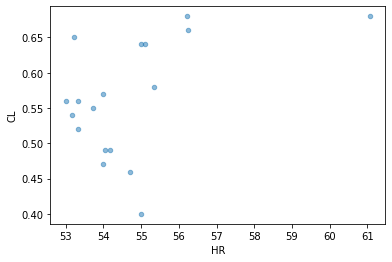

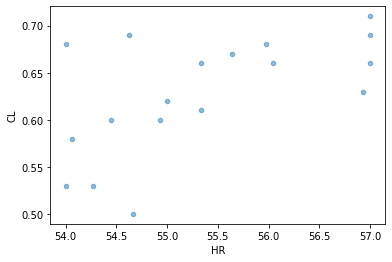

In [8]:
# Create a scatter plot of cognitive load vs heart rate
grouped.plot.scatter(x = 'HR', y = 'CL', alpha = 0.5)

# Time series

In [9]:
# Load the time series gaze data file
tdata = pd.read_csv(TIME_SERIES_DATA, compression = 'infer')

In [12]:
tdata.describe()
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443844 entries, 0 to 443843
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    443844 non-null  float64
 1   ID      443844 non-null  int64  
 2   HR      443844 non-null  int64  
 3   CL      443844 non-null  float64
 4   EyeY    443844 non-null  float64
 5   EyeP    443844 non-null  float64
 6   EyeR    443844 non-null  float64
 7   HeadY   443844 non-null  float64
 8   HeadP   443844 non-null  float64
 9   HeadR   443844 non-null  float64
 10  FullY   443844 non-null  float64
 11  FullP   443844 non-null  float64
 12  FullR   443844 non-null  float64
 13  Open    443844 non-null  float64
dtypes: float64(12), int64(2)
memory usage: 47.4 MB


In [13]:
print(tdata.shape)

# Eliminte practice triasl (42) and gaze invalid gaze samples (eye yaw equals 135 deg)
df = tdata[(tdata.ID != 42) & (tdata.EyeY != 135)].set_index('ID')
print(df.shape)

grouped = df.groupby(level = 'ID')
df.info()

(443844, 14)
(421942, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 421942 entries, 21 to 83
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    421942 non-null  float64
 1   HR      421942 non-null  int64  
 2   CL      421942 non-null  float64
 3   EyeY    421942 non-null  float64
 4   EyeP    421942 non-null  float64
 5   EyeR    421942 non-null  float64
 6   HeadY   421942 non-null  float64
 7   HeadP   421942 non-null  float64
 8   HeadR   421942 non-null  float64
 9   FullY   421942 non-null  float64
 10  FullP   421942 non-null  float64
 11  FullR   421942 non-null  float64
 12  Open    421942 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 45.1 MB


In [14]:
grouped[['EyeY','HeadY']].std()

,EyeY,HeadY
ID,,
21,7.710835,1.791939
83,5.191158,2.132015


21         AxesSubplot(0.1,0.15;0.363636x0.75)
83    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

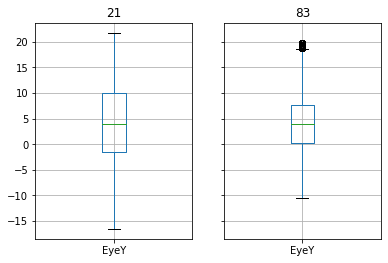

In [15]:
grouped.boxplot(column = 'EyeY')

21         AxesSubplot(0.1,0.15;0.363636x0.75)
83    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

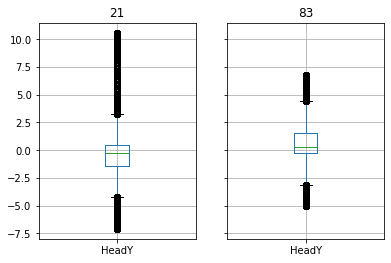

In [16]:
grouped.boxplot(column = 'HeadY')

ID
21    AxesSubplot(0.125,0.125;0.775x0.755)
83    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

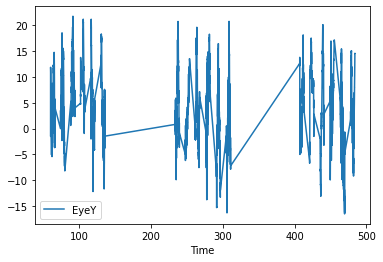

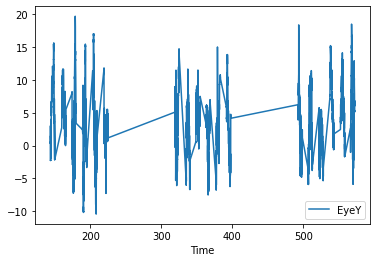

In [17]:
# df.plot(x = 'Time', y = 'EyeY', figsize = (14,6))
# df.plot(x = 'Time', y = 'HeadY', figsize = (14,6))
grouped.plot(x = 'Time', y = 'EyeY')

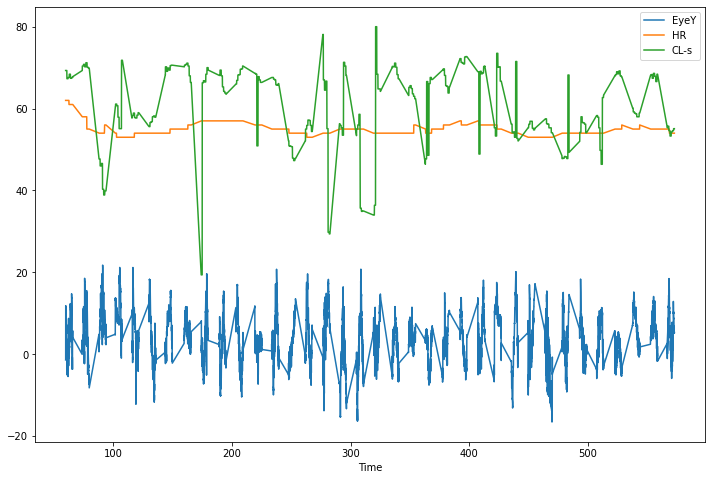

In [18]:
df['CL-s'] = df['CL'] * 100
df[['Time', 'EyeY', 'HR', 'CL-s']].plot(x='Time', figsize = (12,8))